In [1]:
import pandas as pd
import seaborn as sns

# Explore the processed similarity data
### Load Data

In [23]:
df = pd.read_csv('data/sim.csv', index_col=0)
df.head()

,Unnamed: 0,docstring,code,stars,repo,sim
0,0,Bind indexed elements to the supplied collecti...,protected final void bindIndexed(Configuration...,68742,spring-projects/spring-boot,0.714404
1,1,Set {@link ServletRegistrationBean}s that the ...,public void setServletRegistrationBeans(\n\t\t...,68742,spring-projects/spring-boot,0.595693
2,2,Add {@link ServletRegistrationBean}s for the f...,public void addServletRegistrationBeans(\n\t\t...,68742,spring-projects/spring-boot,0.688578
3,3,Set servlet names that the filter will be regi...,public void setServletNames(Collection<String>...,68742,spring-projects/spring-boot,0.912222
4,4,Add servlet names for the filter.\n@param serv...,public void addServletNames(String... servletN...,68742,spring-projects/spring-boot,0.579986


## Visualisations
Scatter plot of cosine similarity to repo max stars

<Axes: xlabel='stars', ylabel='sim'>

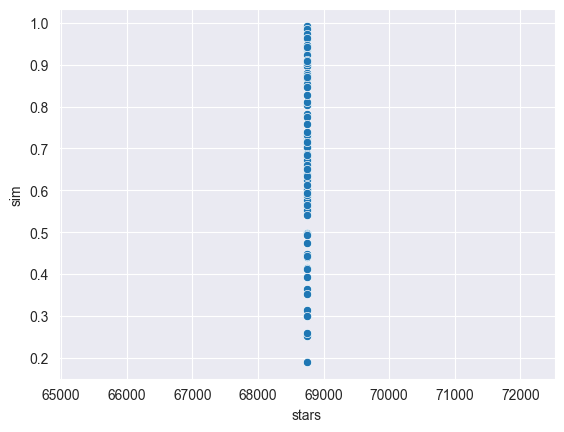

In [3]:
sns.scatterplot(df[df.stars < 80000], x='stars', y='sim')

Scatter plot of mean cosine similarity by repo

In [4]:
df_repo = df[['repo', 'stars', 'sim']].groupby('repo').mean()
df_repo.head()

,stars,sim
repo,,
spring-projects/spring-boot,68742.0,0.688608


/Users/marcus/workspace/Programming/JavaDoc_Code_Similarity/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


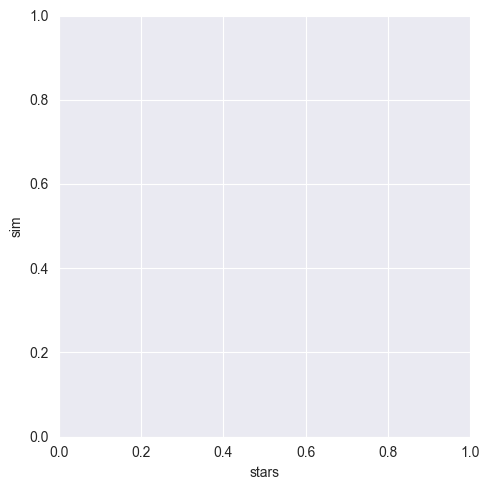

In [9]:
sns.lmplot(df_repo[df_repo.stars < 1200], x='stars', y='sim')

### Length to sim relation

In [42]:
df_len = df.copy()

df_len['doc_len'] = df_len['docstring'].apply(len)
df_len['code_len'] = df_len['code'].apply(len)
df_doc_len = df_len[['doc_len', 'sim']]
df_code_len = df_len[['code_len', 'sim']]

df_doc_len.columns = ['len', 'sim']
df_code_len.columns = ['len', 'sim']

df_len = pd.concat([df_doc_len.assign(dataset='doc_len'), df_code_len.assign(dataset='code_len')])
df_len.head()

,len,sim,dataset
0,331,0.714404,doc_len
1,143,0.595693,doc_len
2,156,0.688578,doc_len
3,212,0.912222,doc_len
4,78,0.579986,doc_len


/Users/marcus/workspace/Programming/JavaDoc_Code_Similarity/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


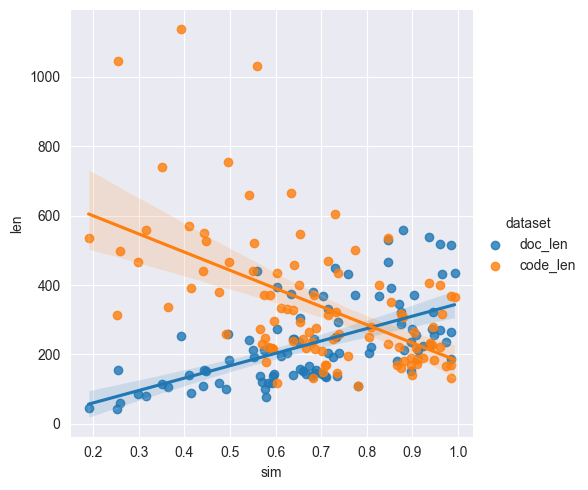

In [48]:
sns.lmplot(df_len, x='sim', y='len', hue='dataset')

### Example Docstring/Code Pairs

In [6]:
df_sorted = df.sort_values('sim')
df_sorted.head()

,Unnamed: 0,docstring,code,stars,repo,sim
88,89,Start monitoring the source folder for changes.,public void start() {\n\t\tsynchronized (this....,68742,spring-projects/spring-boot,0.190309
33,33,Trigger livereload of all connected clients.,public void triggerReload() {\n\t\tsynchronize...,68742,spring-projects/spring-boot,0.251787
8,8,Configure registration settings. Subclasses ca...,@Override\n\tprotected void configure(FilterRe...,68742,spring-projects/spring-boot,0.255272
72,72,Compile and run the application.\n@throws Exce...,public void compileAndRun() throws Exception {...,68742,spring-projects/spring-boot,0.258998
89,90,Stop monitoring the source folders.\n@param re...,void stopAfter(int remainingScans) {\n\t\tThre...,68742,spring-projects/spring-boot,0.298791


Worst

In [7]:
print("===== DOCSTRING ======")
print(df_sorted.iloc[0].docstring)
print("===== CODE =====")
print(df_sorted.iloc[0].code)
print(f"==== COSINE SIM: {df_sorted.iloc[0].sim}====")

===== DOCSTRING ======
Start monitoring the source folder for changes.
===== CODE =====
public void start() {
		synchronized (this.monitor) {
			saveInitialSnapshots();
			if (this.watchThread == null) {
				Map<File, FolderSnapshot> localFolders = new HashMap<>();
				localFolders.putAll(this.folders);
				this.watchThread = new Thread(new Watcher(this.remainingScans,
						new ArrayList<>(this.listeners), this.triggerFilter,
						this.pollInterval, this.quietPeriod, localFolders));
				this.watchThread.setName("File Watcher");
				this.watchThread.setDaemon(this.daemon);
				this.watchThread.start();
			}
		}
	}
==== COSINE SIM: 0.1903092116117477====


Best

In [8]:
print("===== DOCSTRING ======")
print(df_sorted.iloc[-1].docstring)
print("===== CODE =====")
print(df_sorted.iloc[-1].code)
print(f"==== COSINE SIM: {df_sorted.iloc[-1].sim}====")

===== DOCSTRING ======
Return the {@link Health} of a particular {@code instance} managed by the specified
{@code component} or {@code null} if that particular component is not a
{@link CompositeHealthIndicator} or if such instance does not exist.
@param component the name of a particular {@link CompositeHealthIndicator}
@param instance the name of an instance managed by that component
@return the {@link Health} for the component instance of {@code null}
===== CODE =====
@ReadOperation
	public Health healthForComponentInstance(@Selector String component,
			@Selector String instance) {
		HealthIndicator indicator = getNestedHealthIndicator(this.healthIndicator,
				component);
		HealthIndicator nestedIndicator = getNestedHealthIndicator(indicator, instance);
		return (nestedIndicator != null) ? nestedIndicator.health() : null;
	}
==== COSINE SIM: 0.9924806356430054====
